<a href="https://colab.research.google.com/github/thiagoti2025/Cartilhas-Python/blob/main/ATIVIDADE_AN%C3%81LISE_DE_DADOS_COM_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Banco de dados e tabela 'vendas' assegurados e preenchidos.

>>> Visão Geral do DataFrame <<<
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_venda     14 non-null     int64  
 1   data_venda   14 non-null     object 
 2   produto      14 non-null     object 
 3   categoria    14 non-null     object 
 4   valor_venda  14 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 692.0+ bytes
None
............................................................

>>> Primeiras 14 Linhas do DataFrame <<<
    id_venda  data_venda    produto    categoria  valor_venda
0          1  2023-01-01  Produto A  Eletrônicos       1500.0
1          2  2023-01-05  Produto B       Roupas        350.0
2          3  2023-02-10  Produto C  Eletrônicos       1200.0
3          4  2023-03-15  Produto D       Livros        200.0
4          5  2023-03-20 

/tmp/ipython-input-4163501991.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=vendas_por_categoria.index, y=vendas_por_categoria.values, palette="viridis")


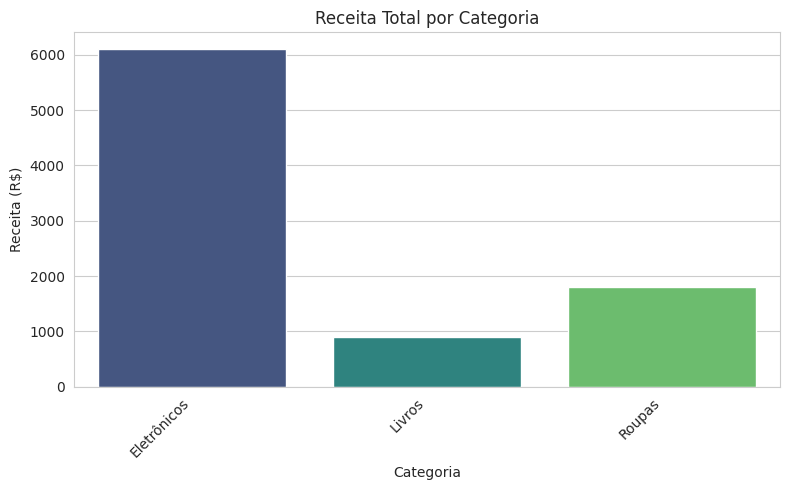

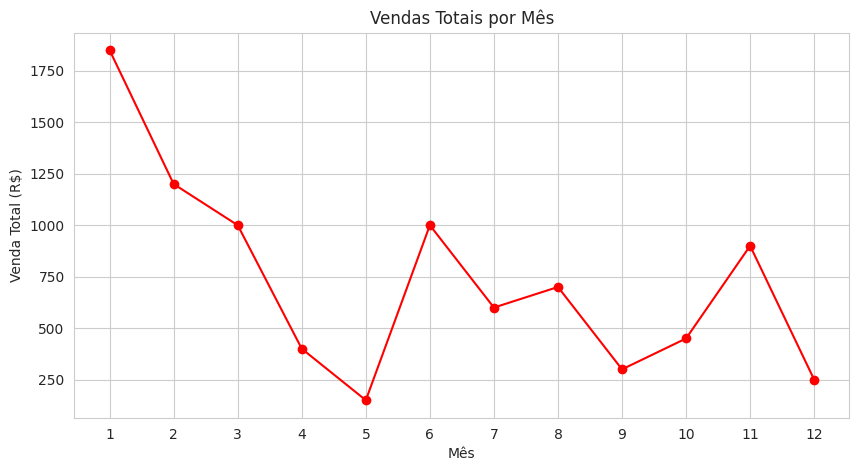

In [6]:
import sqlite3

# Conectar ao banco de dados SQLite e criar uma tabela.
conexao = sqlite3.connect('dados_vendas.db')
# Criar um cursor.
cursor = conexao.cursor()

# Remover a tabela se ela existir para começar do zero.
cursor.execute("DROP TABLE IF EXISTS vendas")

# Criar uma tabela (se não existir).
cursor.execute('''
CREATE TABLE vendas (
    id_venda INTEGER PRIMARY KEY AUTOINCREMENT,
    data_venda DATE,
    produto TEXT,
    categoria TEXT,
    valor_venda REAL
)
''')

# Inserir alguns dados.
cursor.execute('''
INSERT INTO vendas('data_venda', 'produto', 'categoria', valor_venda) VALUES
  ('2023-01-01', 'Produto A', 'Eletrônicos', 1500.00),
  ('2023-01-05', 'Produto B', 'Roupas', 350.00),
  ('2023-02-10', 'Produto C', 'Eletrônicos', 1200.00),
  ('2023-03-15', 'Produto D', 'Livros', 200.00),
  ('2023-03-20', 'Produto E', 'Eletrônicos', 800.00),
  ('2023-04-02', 'Produto F', 'Roupas', 400.00),
  ('2023-05-05', 'Produto G', 'Livros', 150.00),
  ('2023-06-10', 'Produto H', 'Eletrônicos', 1000.00),
  ('2023-07-20', 'Produto I', 'Roupas', 600.00),
  ('2023-08-25', 'Produto J', 'Eletrônicos', 700.00),
  ('2023-09-30', 'Produto K', 'Livros', 300.00),
  ('2023-10-05', 'Produto L', 'Roupas', 450.00),
  ('2023-11-15', 'Produto M', 'Eletrônicos', 900.00),
  ('2023-12-20', 'Produto N', 'Livros', 250.00);
''')

# confirmar as mudanças.
conexao.commit()
# fechar a conexão.
conexao.close()
print("Banco de dados e tabela 'vendas' assegurados e preenchidos.")

# Utilize Matplotlib e Seaborn para criar visualizações que ajudem na interpretação dos resultados.
# Importa as bibliotecas principais.
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

# conexão e leitura (Extração).
conexao = sqlite3.connect('dados_vendas.db')
df_vendas = pd.read_sql_query("SELECT * FROM vendas", conexao)
conexao.close()

# Visualizar e inspecionar.
print("\n>>> Visão Geral do DataFrame <<<")
print(df_vendas.info())
print("..." * 20)

print("\n>>> Primeiras 14 Linhas do DataFrame <<<")
print(df_vendas.head(14))  # Mostra as primeiras 14 linhas.
print("..." * 20)

# TRATAMENTO (Preparação).
# Converte a coluna de data para o formato datetime.
df_vendas['data_venda'] = pd.to_datetime(df_vendas['data_venda'])

# Cria a coluna 'mes' para análise de sazonalidade.
df_vendas['mes'] = df_vendas['data_venda'].dt.month

print("\n>>> DataFrame Próxima Etapa: Após Preparação <<<")
print(df_vendas[['data_venda', 'mes', 'categoria', 'valor_venda']].head(14))
print("..." * 20)

# ----------
print("\n>>> Dados prontos para análise (Data) <<<")
print(df_vendas[['data_venda', 'valor_venda']].head(14))
print("..." * 20)

# ANÁLISE (Agrupamento).
# Vendas por Categoria.
vendas_por_categoria = df_vendas.groupby('categoria') ['valor_venda'].sum()

# Vendas por Mês.
vendas_por_mes = df_vendas.groupby('mes') ['valor_venda'].sum()

print("\n>>> Receita por Categoria: <<<")
print(vendas_por_categoria)
print("..." * 20)

print("\n>>> Receita por Mês: <<<")
print(vendas_por_mes)
print("..." * 20)

# Configura o estilo visual do Seaborn.
sns.set_style("whitegrid")

# GRÁFICO 1: Barras - Receita por Categoria.
plt.figure(figsize=(8, 5))
sns.barplot(x=vendas_por_categoria.index, y=vendas_por_categoria.values, palette="viridis")
plt.title('Receita Total por Categoria')
plt.ylabel('Receita (R$)')
plt.xlabel('Categoria')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# GRÁFICO 2: Linhas - Vendas por Mês (Tendência).
plt.figure(figsize=(10, 5))
plt.plot(vendas_por_mes.index, vendas_por_mes.values, marker='o', color='red')
plt.title('Vendas Totais por Mês')
plt.xlabel('Mês')
plt.ylabel('Venda Total (R$)')
plt.xticks(vendas_por_mes.index) # Mostra os números de todos os meses
plt.grid(True, axis='y')
plt.show()